In [1]:

#!pip install pygrib  # For PyGRIB

# url: https://cds.climate.copernicus.eu/api/v2
#key: {267762}:{48ec6a98-a4a4-44c7-b5ab-ef4a29808b72}
!pip install cdsapi
!pip install utils
!pip install pygrib  # For PyGRIB
!pip install cfgrib xarray netCDF4 
!pip install keras-tuner --upgrade

import cdsapi
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from glob import glob
import xarray as xr

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Model, load_model
from tensorflow.keras.layers import *
from tensorflow.keras import Sequential
from tensorflow.keras.regularizers import l1_l2
from utils import * 

import keras_tuner

%matplotlib inline
%config InlineBackend.figure_format = 'retina'
%load_ext autoreload
%autoreload 2

plt.rcParams['savefig.dpi'] = 400
plt.rcParams['font.size'] = 13
plt.rcParams["legend.frameon"] = False

  Using cached utils-1.0.1-py2.py3-none-any.whl (21 kB)
  Obtaining dependency information for pygrib from https://files.pythonhosted.org/packages/39/54/3d3faee05f61f1bc3c3142c71c4bf262e6c14b0e2039beae192fe68a6cf8/pygrib-2.1.5-cp310-cp310-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata
  Using cached pygrib-2.1.5-cp310-cp310-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (2.8 kB)
Using cached pygrib-2.1.5-cp310-cp310-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (18.1 MB)
  Obtaining dependency information for keras-tuner from https://files.pythonhosted.org/packages/2b/39/21f819fcda657c37519cf817ca1cd03a8a025262aad360876d2a971d38b3/keras_tuner-1.4.6-py3-none-any.whl.metadata
  Using cached keras_tuner-1.4.6-py3-none-any.whl.metadata (5.4 kB)
  Using cached kt_legacy-1.0.5-py3-none-any.whl (9.6 kB)
Using cached keras_tuner-1.4.6-py3-none-any.whl (128 kB)


2023-12-22 11:05:12.634665: I tensorflow/core/util/port.cc:110] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2023-12-22 11:05:12.673679: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: SSE4.1 SSE4.2 AVX AVX2 AVX512F AVX512_VNNI FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [2]:
api_key_content = """
url: https://cds.climate.copernicus.eu/api/v2
key: 267762:48ec6a98-a4a4-44c7-b5ab-ef4a29808b72
"""
with open('/home/jovyan/.cdsapirc', 'w') as file:
    file.write(api_key_content)

In [3]:


# c = cdsapi.Client()

# c.retrieve(
#     'reanalysis-era5-single-levels',
#     {
#         'product_type': 'reanalysis',
#         'variable': [
#             '100m_u_component_of_wind', '100m_v_component_of_wind', 'sea_surface_temperature',
#             'surface_pressure', 
#         ],
#         'year': [
#             '2013', '2014', '2015'
#         ],
#         'month': [
#             '01', '02', '03',
#             '04', '05', '06',
#             '07', '08', '09',
#             '10', '11', '12',
#         ],
#         'day': [
#             '01', '02', '03',
#             '04', '05', '06',
#             '07', '08', '09',
#             '10', '11', '12',
#             '13', '14', '15',
#             '16', '17', '18',
#             '19', '20', '21',
#             '22', '23', '24',
#             '25', '26', '27',
#             '28', '29', '30',
#             '31',
#         ],
#         'time': [
#             '00:00', '01:00', '02:00',
#             '03:00', '04:00', '05:00',
#             '06:00', '07:00', '08:00',
#             '09:00', '10:00', '11:00',
#             '12:00', '13:00', '14:00',
#             '15:00', '16:00', '17:00',
#             '18:00', '19:00', '20:00',
#             '21:00', '22:00', '23:00',
#         ],
#         'area': [
#             42.25, -126, 32.5,
#             -114.2,
#         ],
#         'format': 'netcdf',
#     },
#     '2013-2015.netcdf')

In [4]:
# c_test = cdsapi.Client()

# c_test.retrieve(
#     'reanalysis-era5-single-levels',
#     {
#         'product_type': 'reanalysis',
#         'variable': [
#             '100m_u_component_of_wind', '100m_v_component_of_wind', 'sea_surface_temperature',
#             'surface_pressure', 
#         ],
#         'year': [
#             '2019', '2020',
#         ],
#         'month': [
#             '01', '02', '03',
#             '04', '05', '06',
#             '07', '08', '09',
#             '10', '11', '12',
#         ],
#         'day': [
#             '01', '02', '03',
#             '04', '05', '06',
#             '07', '08', '09',
#             '10', '11', '12',
#             '13', '14', '15',
#             '16', '17', '18',
#             '19', '20', '21',
#             '22', '23', '24',
#             '25', '26', '27',
#             '28', '29', '30',
#             '31',
#         ],
#         'time': [
#             '00:00', '01:00', '02:00',
#             '03:00', '04:00', '05:00',
#             '06:00', '07:00', '08:00',
#             '09:00', '10:00', '11:00',
#             '12:00', '13:00', '14:00',
#             '15:00', '16:00', '17:00',
#             '18:00', '19:00', '20:00',
#             '21:00', '22:00', '23:00',
#         ],
#         'area': [
#             42.25, -126, 32.5,
#             -114.2,
#         ],
#         'format': 'netcdf',
#     },
#     'download2.netcdf')

In [5]:
# Open the GRIB file using xarray and cfgrib
ds1012 = xr.open_dataset('/home/jovyan/2010-2012.netcdf')
ds1315 = xr.open_dataset('/home/jovyan/2013-2015.netcdf')
ds_train = xr.concat([ds1012,ds1315], dim='time')
# ds_test = xr.concat([xr.open_dataset('/home/jovyan/download2.netcdf'),xr.open_dataset('/home/jovyan/download.netcdf')], dim='time')
#ds_train = xr.open_dataset('/home/jovyan/2013-2015.netcdf')#/home/jovyan/2010-2012.nc
ds_test = xr.open_dataset('/home/jovyan/download.netcdf')

In [6]:
ws_train = (((ds_train["u100"])**2+(ds_train["v100"])**2)**0.5)
ws_test = (((ds_test["u100"])**2+(ds_test["v100"])**2)**0.5)

In [7]:
ws_train

<xarray.DataArray (time: 52584, latitude: 40, longitude: 48)>
array([[[15.931811  , 16.25802   , 16.923765  , ...,  9.471138  ,
          8.877125  ,  7.6949015 ],
        [16.499662  , 16.601284  , 17.026043  , ...,  8.441301  ,
          7.811518  ,  6.99122   ],
        [17.26509   , 17.120064  , 17.302656  , ...,  6.754462  ,
          6.328307  ,  5.2951393 ],
        ...,
        [ 3.1856425 ,  3.0567975 ,  2.984371  , ...,  6.959629  ,
          6.36082   ,  5.2429338 ],
        [ 2.829245  ,  2.702483  ,  2.5155451 , ...,  6.2627635 ,
          5.6110535 ,  4.7842765 ],
        [ 2.650375  ,  2.566493  ,  2.225311  , ...,  6.2675524 ,
          5.7948704 ,  5.4531255 ]],

       [[16.097422  , 16.190348  , 16.499056  , ...,  9.757386  ,
          9.100183  ,  7.972443  ],
        [16.552298  , 16.43508   , 16.561928  , ...,  8.543483  ,
          7.7641797 ,  7.073051  ],
        [16.924728  , 16.558607  , 16.538668  , ...,  6.853992  ,
          6.3941555 ,  5.4223375 ],
...
        [ 1.8689308 ,  2.5180476 ,  3.6142426 , ...,  6.645717  ,
          6.2434735 ,  5.2192845 ],
        [ 1.5078609 ,  1.7661873 ,  2.4481623 , ...,  6.410967  ,
          5.9396777 ,  5.0426073 ],
        [ 1.8317016 ,  1.4606202 ,  1.487362  , ...,  6.736318  ,
          6.5307508 ,  5.9072046 ]],

       [[ 4.914782  ,  4.964613  ,  4.8927574 , ...,  2.2659159 ,
          1.9396881 ,  2.0833135 ],
        [ 4.306365  ,  4.4675703 ,  4.5495973 , ...,  1.5417311 ,
          1.183518  ,  1.7776747 ],
        [ 3.961981  ,  4.2075224 ,  4.4306006 , ...,  1.1989903 ,
          1.1956493 ,  1.6384803 ],
        ...,
        [ 2.5195491 ,  3.0318859 ,  4.1493287 , ...,  7.276718  ,
          6.9102335 ,  6.028552  ],
        [ 2.1147451 ,  2.4487567 ,  3.290593  , ...,  6.792865  ,
          6.4020953 ,  5.6890707 ],
        [ 2.1472409 ,  1.9392763 ,  2.1859865 , ...,  7.103189  ,
          6.970617  ,  6.530981  ]]], dtype=float32)
Coordinates:
  * longitude  (longitude) float32 -126.0 -125.8 -125.5 ... -114.8 -114.5 -114.2
  * latitude   (latitude) float32 42.25 42.0 41.75 41.5 ... 33.0 32.75 32.5
  * time       (time) datetime64[ns] 2010-01-01 ... 2015-12-31T23:00:00

In [8]:
sst_train = ds_train['sst'].mean(dim=['latitude', 'longitude'])
sst_test = ds_test['sst'].mean(dim=['latitude', 'longitude'])

# Flatten the 'sp' variable across latitude and longitude dimensions to get a time series
sp_train = ds_train['sp'].mean(dim=['latitude', 'longitude'])
sp_test = ds_test['sp'].mean(dim=['latitude', 'longitude'])

# Convert to pandas DataFrame
sst_train_df = sst_train.to_dataframe(name='sst')
sp_train_df = sp_train.to_dataframe(name='sp')
sst_test_df = sst_test.to_dataframe(name='sst')
sp_test_df = sp_test.to_dataframe(name='sp')

# Join the two dataframes on the time index
train_df = pd.concat([sst_train_df, sp_train_df], axis=1)
test_df = pd.concat([sst_test_df, sp_test_df], axis=1)

In [9]:
X_train_df = train_df
X_test_df  = test_df

y_train = ws_train.data
y_test  = ws_test.data

In [10]:
X_train_df

,sst,sp
time,,
2010-01-01 00:00:00,286.751740,93827.398438
2010-01-01 01:00:00,286.751648,93830.335938
2010-01-01 02:00:00,286.751495,93867.648438
2010-01-01 03:00:00,286.751373,93885.468750
2010-01-01 04:00:00,286.751221,93913.265625
...,...,...
2015-12-31 19:00:00,287.151398,93742.351562
2015-12-31 20:00:00,287.151642,93671.445312
2015-12-31 21:00:00,287.151947,93600.742188


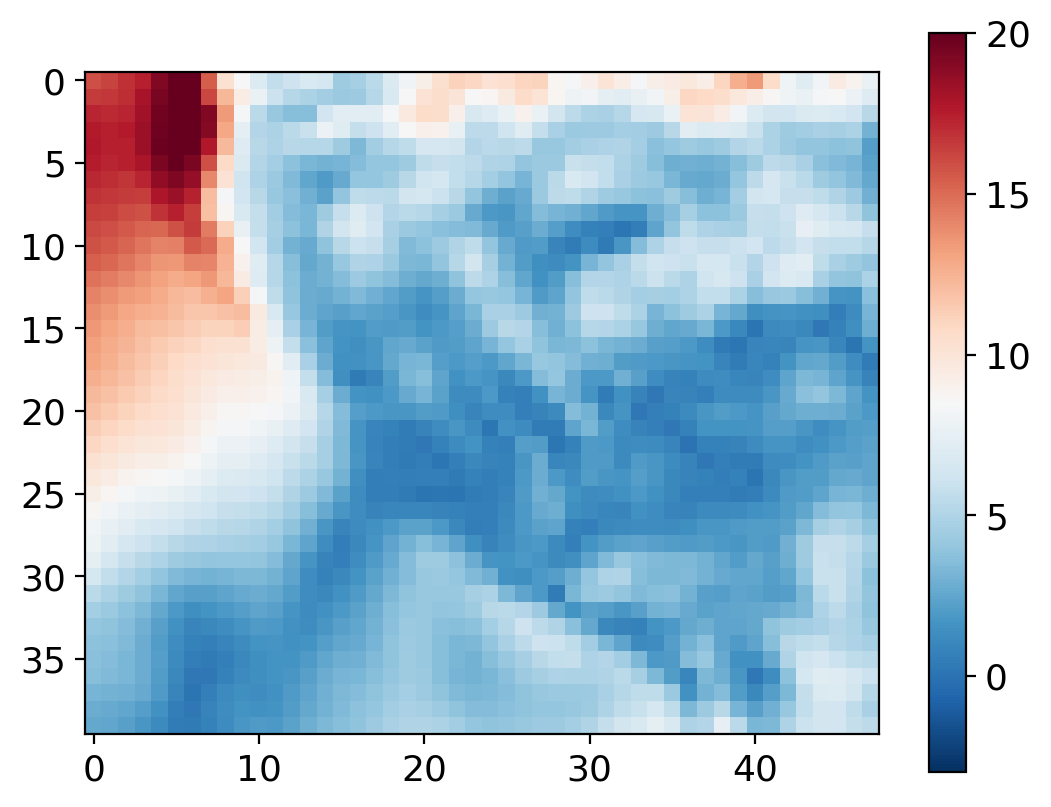

In [11]:
plt.imshow(y_train[0],cmap='RdBu_r',vmin=-3,vmax=20)
plt.colorbar()

In [12]:
# Standardization
mean, std = X_train_df.mean(), X_train_df.std()

X_train_df   = (X_train_df - mean)/std
X_test_df    = (X_test_df - mean)/std

X_train = X_train_df.to_numpy()
X_test = X_test_df.to_numpy()

In [13]:
print(X_train.shape,y_train.shape,X_test.shape,y_test.shape)

(52584, 2) (52584, 40, 48) (17520, 2) (17520, 40, 48)


In [14]:
minibatch_size = 64
num_epochs     = 80
n_trials       = 10   # total number of trials in hyperparameter tuning


In [15]:
def build_model(hp):
    
    # options for hyperparameters
    hp_filters = hp.Choice('filters', values=[16,32,64])
    hp_kernel_size = hp.Choice('kernel_size', values=[2,3,4,5])
    hp_activation = hp.Choice('activation', values=['relu', 'tanh', 'sigmoid'])
    hp_learning_rate = hp.Choice('learning_rate', values=[1e-2, 5e-2, 1e-3, 5e-3, 5e-4])
    hp_loss = hp.Choice('loss', values=['mse','mae'])
    
    # build CNN models according to the hyperparameters
    model = keras.models.Sequential()

    model.add(Dense(hp_filters*5*6, input_shape=(X_train.shape[1],), activation=hp_activation)) 
    model.add(Reshape((5,6,hp_filters))) # shape: (12,18,filters)
    
    model.add(Conv2DTranspose(filters=hp_filters, kernel_size=hp_kernel_size, 
                              activation=hp_activation, strides=2, padding='same')) # shape: (10,12,filters)
    
    model.add(Conv2DTranspose(filters=hp_filters, kernel_size=hp_kernel_size, 
                              activation=hp_activation, strides=2, padding='same')) # shape: (20,24,filters)
    
    model.add(Conv2DTranspose(filters=hp_filters, kernel_size=hp_kernel_size, 
                              activation=hp_activation, strides=2, padding='same')) # shape: (40,48,filters)
    
    model.add(Conv2DTranspose(filters=1, kernel_size=hp_kernel_size, 
                              activation="linear", padding="same")) # shape: (96,144,1)
    
    model.compile(loss=hp_loss, optimizer=tf.keras.optimizers.Adam(learning_rate=hp_learning_rate))
    
    return model

In [16]:
# Instantiate the Tuner and save the trials in a directory with customized project name
random_tuner = keras_tuner.RandomSearch(build_model, 
                                        max_trials=n_trials,
                                        seed=5,
                                        objective='val_loss', 
                                        max_retries_per_trial=0,
                                        max_consecutive_failed_trials=3,
                                        directory='BayesianOptimization', 
                                        project_name='BayesianOptimization_CNN_10trials')

Reloading Tuner from BayesianOptimization/BayesianOptimization_CNN_10trials/tuner0.json


In [17]:
random_tuner.search_space_summary()

Search space summary
Default search space size: 5
filters (Choice)
{'default': 16, 'conditions': [], 'values': [16, 32, 64], 'ordered': True}
kernel_size (Choice)
{'default': 2, 'conditions': [], 'values': [2, 3, 4, 5], 'ordered': True}
activation (Choice)
{'default': 'relu', 'conditions': [], 'values': ['relu', 'tanh', 'sigmoid'], 'ordered': False}
learning_rate (Choice)
{'default': 0.01, 'conditions': [], 'values': [0.01, 0.05, 0.001, 0.005, 0.0005], 'ordered': True}
loss (Choice)
{'default': 'mse', 'conditions': [], 'values': ['mse', 'mae'], 'ordered': False}


In [21]:
early_stop = keras.callbacks.EarlyStopping(monitor='val_loss', patience=10)

In [19]:
# Perform hypertuning
random_tuner.search(X_train, y_train,
                    batch_size = minibatch_size,
                    epochs = num_epochs, 
                    validation_split = 0.2, 
                    callbacks = [early_stop])


Trial 10 Complete [00h 09m 13s]
val_loss: 2.0767292976379395

Best val_loss So Far: 2.0723466873168945
Total elapsed time: 01h 51m 02s


In [18]:
# display the model structure with the best tuning
best_model = random_tuner.get_best_models()[0]
best_model.summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 960)               2880      
                                                                 
 reshape (Reshape)           (None, 5, 6, 32)          0         
                                                                 
 conv2d_transpose (Conv2DTra  (None, 10, 12, 32)       4128      
 nspose)                                                         
                                                                 
 conv2d_transpose_1 (Conv2DT  (None, 20, 24, 32)       4128      
 ranspose)                                                       
                                                                 
 conv2d_transpose_2 (Conv2DT  (None, 40, 48, 32)       4128      
 ranspose)                                                       
                                                        

In [19]:
# check hyperparameters of the all tuning trials
all_hps = random_tuner.get_best_hyperparameters(num_trials=n_trials)

# print the hyperparameters of the top 3 tuning trials
for it in range(3):
    print("Ranking #", str(it+1).zfill(1), "of best tuning, total trials = ", str(n_trials))
    print(all_hps[it].values)
    print("=============================================================================================")


# get the hyperparameters of the best tuning trial
best_hps = random_tuner.get_best_hyperparameters(num_trials=n_trials)[0]

# get the hyperparameters of the second ranking tuning trial
top2_hps = random_tuner.get_best_hyperparameters(num_trials=n_trials)[1]

Ranking # 1 of best tuning, total trials =  10
{'filters': 32, 'kernel_size': 2, 'activation': 'relu', 'learning_rate': 0.001, 'loss': 'mae'}
Ranking # 2 of best tuning, total trials =  10
{'filters': 64, 'kernel_size': 2, 'activation': 'sigmoid', 'learning_rate': 0.0005, 'loss': 'mae'}
Ranking # 3 of best tuning, total trials =  10
{'filters': 32, 'kernel_size': 2, 'activation': 'sigmoid', 'learning_rate': 0.005, 'loss': 'mae'}


In [22]:
## Build the model with the optimal hyperparameters
# ---------- best tuning ----------
model_best = random_tuner.hypermodel.build(best_hps)

# ---------- ranking #2 tuning ----------
model_top2 = random_tuner.hypermodel.build(top2_hps)



## re-train the model
# ---------- best tuning ----------
history_best = model_best.fit(X_train, y_train,
                              batch_size      = minibatch_size,
                              epochs          = num_epochs,
                              validation_split= 0.2, 
                              verbose         = 1,
                              callbacks       = [early_stop])
# ---------- ranking #2 tuning ----------
history_top2 = model_top2.fit(X_train, y_train,
                              batch_size      = minibatch_size,
                              epochs          = num_epochs,
                              validation_split= 0.2, 
                              verbose         = 1,
                              callbacks       = [early_stop])

Epoch 1/80
658/658 [==============================] - 16s 23ms/step - loss: 2.4341 - val_loss: 2.0901
Epoch 2/80
658/658 [==============================] - 15s 23ms/step - loss: 2.1504 - val_loss: 2.0802
Epoch 3/80
658/658 [==============================] - 15s 23ms/step - loss: 2.1368 - val_loss: 2.0804
Epoch 4/80
658/658 [==============================] - 15s 23ms/step - loss: 2.1304 - val_loss: 2.0858
Epoch 5/80
658/658 [==============================] - 15s 23ms/step - loss: 2.1272 - val_loss: 2.0787
Epoch 6/80
658/658 [==============================] - 15s 23ms/step - loss: 2.1232 - val_loss: 2.0768
Epoch 7/80
658/658 [==============================] - 15s 23ms/step - loss: 2.1218 - val_loss: 2.0824
Epoch 8/80
658/658 [==============================] - 15s 23ms/step - loss: 2.1198 - val_loss: 2.0820
Epoch 9/80
658/658 [==============================] - 15s 23ms/step - loss: 2.1181 - val_loss: 2.0872
Epoch 10/80
658/658 [==============================] - 15s 23ms/step - loss: 2.118

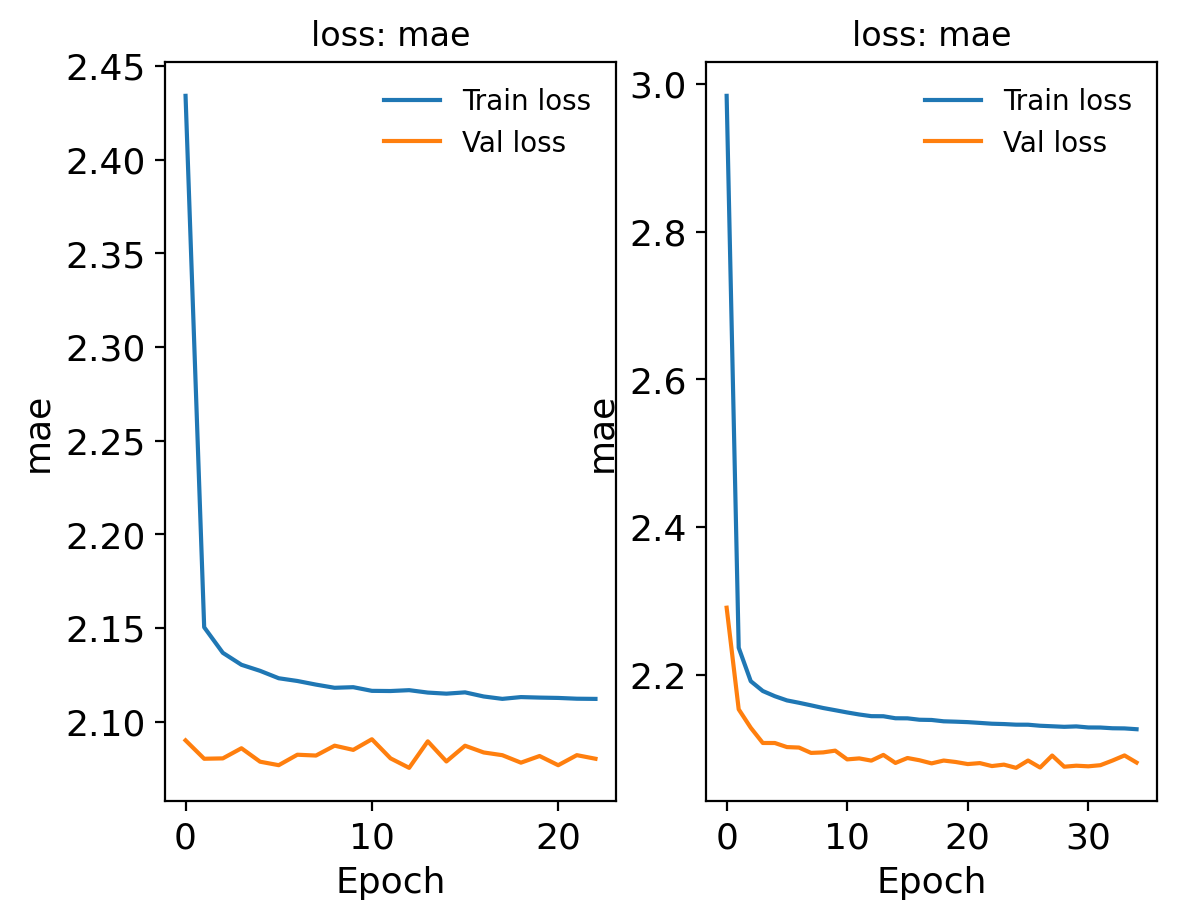

In [23]:
## set up title and ylabel strings
# ---------- best tuning ----------
title_best = 'loss: '+str(best_hps['loss'])
ylabel_best = best_hps['loss']
# ---------- ranking #2 tuning ----------
title_top2 = 'loss: '+str(top2_hps['loss'])
ylabel_top2 = top2_hps['loss']


## plot history
# ---------- best tuning ----------
plt.subplot(1, 2, 1)
plt.plot(history_best.history['loss'])
plt.plot(history_best.history['val_loss'])
plt.title(title_best, fontsize=12)
plt.ylabel(ylabel_best)
plt.xlabel('Epoch')
plt.legend(['Train loss', 'Val loss'], fontsize=10, loc='upper right')

# ---------- ranking #2 tuning ----------
plt.subplot(1, 2, 2)
plt.plot(history_top2.history['loss'])
plt.plot(history_top2.history['val_loss'])
plt.title(title_top2, fontsize=12)
plt.ylabel(ylabel_top2)
plt.xlabel('Epoch')
plt.legend(['Train loss', 'Val loss'], fontsize=10, loc='upper right')

In [32]:
cwd = os.getcwd()
model_path = os.path.join(cwd,'saved_model')
model_best.save(os.path.join(model_path,'CNN_model_randomsearch_10trials_rank1.h5'))
model_top2.save(os.path.join(model_path,'CNN_model_randomsearch_10trials_rank2.h5'))

In [33]:
## generate the prediction from the model
# ---------- best tuning ----------
y_test_best_pre = model_best.predict(X_test)
y_test_best_pre = y_test_best_pre.reshape(y_test_best_pre.shape[0], 40, 48)
y_test_best_pre = xr.Dataset(coords={'time': ds_test.time.values, 
                               'latitude': ds_test.latitude.values, 
                               'longitude': ds_test.longitude.values},
                       data_vars=dict(ws=(['time', 'latitude', 'longitude'], y_test_best_pre)))

# ---------- rank #2 tuning ----------
y_test_top2_pre = model_top2.predict(X_test)
y_test_top2_pre = y_test_top2_pre.reshape(y_test_top2_pre.shape[0], 40, 48)
y_test_top2_pre = xr.Dataset(coords={'time': ds_test.time.values, 
                               'latitude': ds_test.latitude.values, 
                               'longitude': ds_test.longitude.values},
                       data_vars=dict(ws=(['time', 'latitude', 'longitude'], y_test_top2_pre)))



548/548 [==============================] - 9s 17ms/step


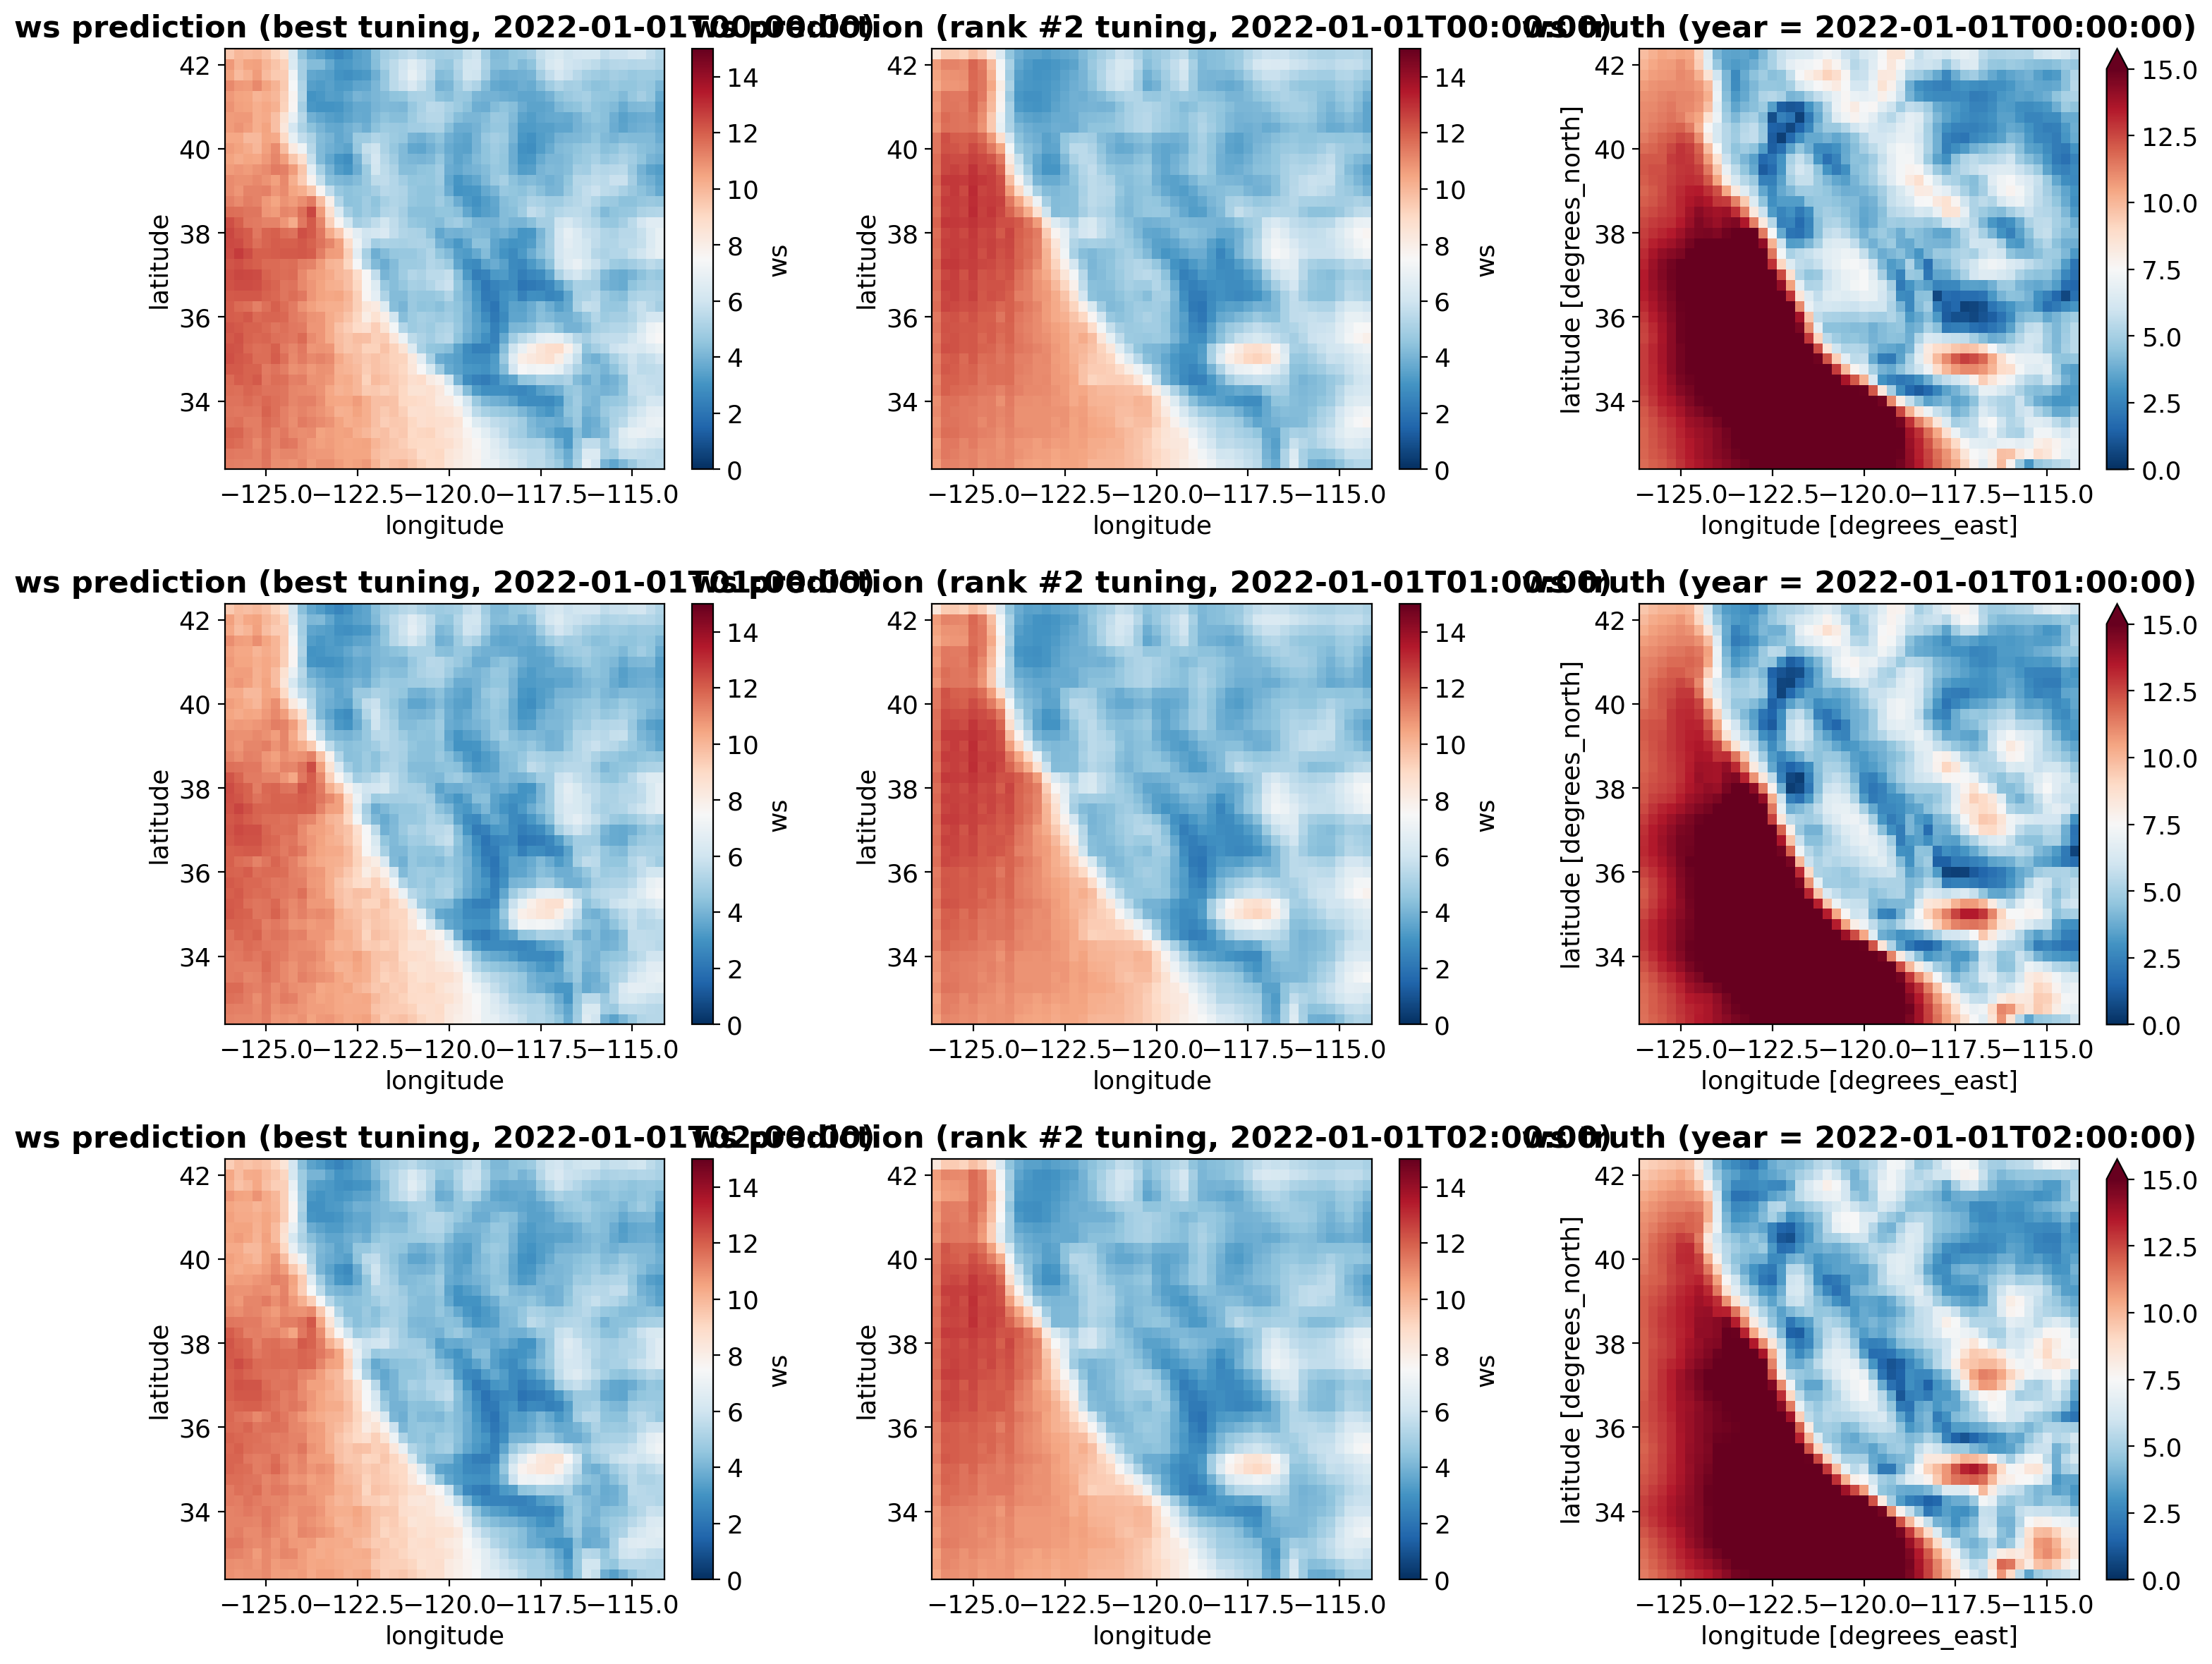

In [34]:
fig, axes = plt.subplots(figsize=(15,12),ncols=3,nrows=3)

yrs = ['2022-01-01T00:00:00', '2022-01-01T01:00:00', '2022-01-01T02:00:00']
vmin, vmax    = 0, 15
cmap = 'RdBu_r'
y_test_best_pre.ws.sel(time=yrs[0]).plot(ax=axes[0,0], vmin=vmin, vmax=vmax,cmap=cmap)
y_test_top2_pre.ws.sel(time=yrs[0]).plot(ax=axes[0,1], vmin=vmin, vmax=vmax,cmap=cmap)
ws_test.sel(time=yrs[0]).plot(ax=axes[0,2], vmin=vmin, vmax=vmax,cmap=cmap)

y_test_best_pre.ws.sel(time=yrs[1]).plot(ax=axes[1,0], vmin=vmin, vmax=vmax,cmap=cmap)
y_test_top2_pre.ws.sel(time=yrs[1]).plot(ax=axes[1,1], vmin=vmin, vmax=vmax,cmap=cmap)
ws_test.sel(time=yrs[1]).plot(ax=axes[1,2], vmin=vmin, vmax=vmax,cmap=cmap)

y_test_best_pre.ws.sel(time=yrs[2]).plot(ax=axes[2,0], vmin=vmin, vmax=vmax,cmap=cmap)
y_test_top2_pre.ws.sel(time=yrs[2]).plot(ax=axes[2,1], vmin=vmin, vmax=vmax,cmap=cmap)
ws_test.sel(time=yrs[2]).plot(ax=axes[2,2], vmin=vmin, vmax=vmax,cmap=cmap)


for i, ax in enumerate(axes.flat):
    # left column: model prediction
    if i % 3 == 0:
        ax.set_title(f'ws prediction (best tuning, {yrs[i//3]})',fontweight='bold')
    # middle column: model prediction
    elif i % 3 == 1:
        ax.set_title(f'ws prediction (rank #2 tuning, {yrs[i//3]})',fontweight='bold')
    # right column: truth tas from ssp245 simulations
    else:
        ax.set_title(f'ws truth (year = {yrs[i//3]})',fontweight='bold')
plt.tight_layout()

Text(0, 0.5, 'Wind Speed (m/s)')

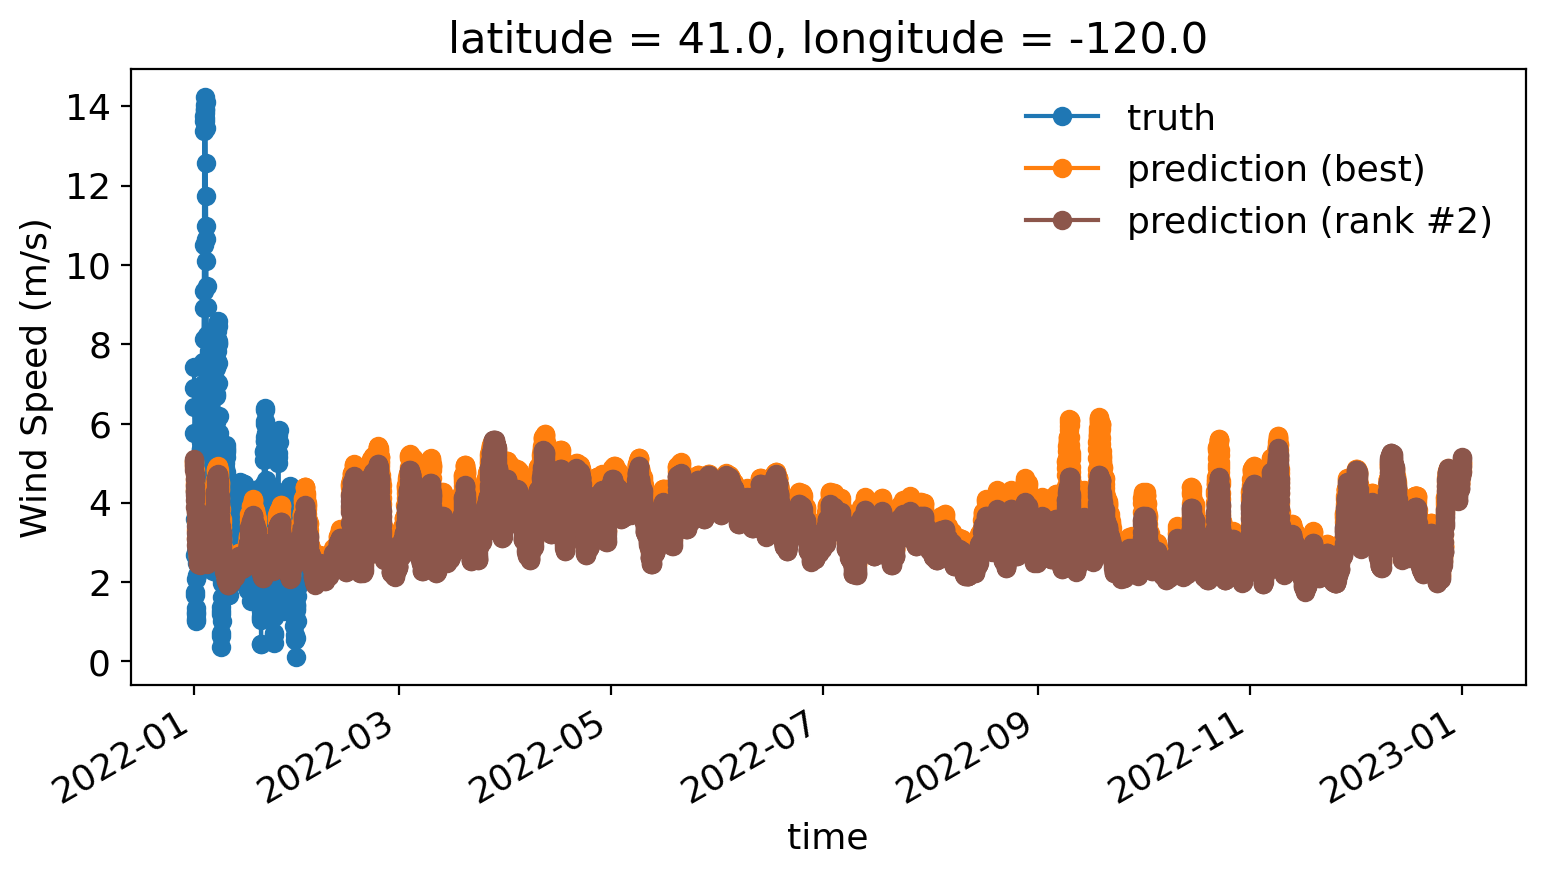

In [35]:
lat = 41
lon = -120  #%360

fig,ax = plt.subplots(figsize=(9,4))
ws_test = ws_test.sel(time=slice("2022-01-01T00:00:00.000000000","2022-12-31T23:00:00.000000000"))
ws_test.sel(latitude=lat,longitude=lon,method='nearest').plot(marker='o',ax=ax,label='truth')

y_test_best_pre = y_test_best_pre.sel(time=slice("2022-01-01T00:00:00","2022-12-31T23:00:00"))
y_test_best_pre.sel(latitude=lat,longitude=lon,method='nearest').ws.plot(marker='o',ax=ax,label='prediction (best)')

y_test_top2_pre = y_test_top2_pre.sel(time=slice("2022-01-01T00:00:00","2022-12-31T23:00:00"))
y_test_top2_pre.sel(latitude=lat,longitude=lon,method='nearest').ws.plot(marker='o',ax=ax,color='tab:brown',label='prediction (rank #2)')
ax.legend()
ax.set_ylabel('Wind Speed (m/s)')

In [36]:
def global_mean_std_plot(X,label,color,ax,var='ws'):
    weights  = np.cos(np.deg2rad(X.latitude))
    ws_mean = X[var].weighted(weights).mean(['latitude', 'longitude']).data
    ws_std  = X[var].weighted(weights).std(['latitude', 'longitude']).data
    
    x = X.time.data

    ax.plot(x, ws_mean, label=label,color=color,linewidth=2)
    ax.fill_between(x,ws_mean+ws_std,ws_mean-ws_std,facecolor=color,alpha=0.2)

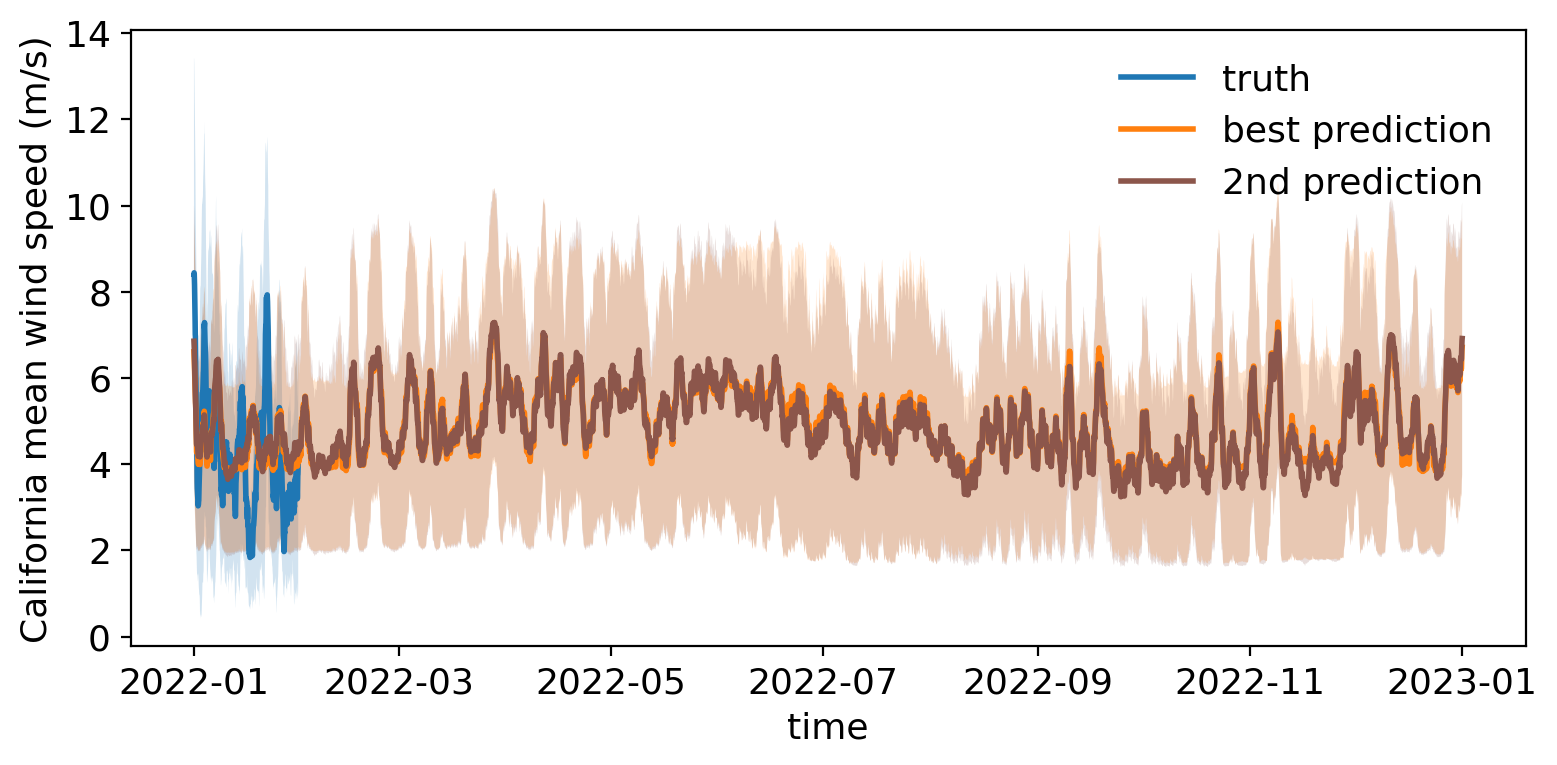

In [37]:
fig,ax = plt.subplots(figsize=(9,4))

weights  = np.cos(np.deg2rad(ws_test.latitude))
ws_mean = ws_test.weighted(weights).mean(['latitude', 'longitude'])
ws_std  = ws_test.weighted(weights).std(['latitude', 'longitude'])

x = ws_test.time.data

ax.plot(x, ws_mean, label='truth',color='tab:blue',linewidth=2)
ax.fill_between(x,ws_mean+ws_std,ws_mean-ws_std,facecolor='tab:blue',alpha=0.2)

global_mean_std_plot(y_test_best_pre,label='best prediction',ax=ax,color='tab:orange')
global_mean_std_plot(y_test_top2_pre,label='2nd prediction',ax=ax,color='tab:brown')

ax.set_xlabel('time')
ax.set_ylabel('California mean wind speed (m/s)')
ax.legend()